In [1]:
import pandas as pd


# Read the CSV file
df = pd.read_csv('D:\\Documents\\36100\\DatasetSelection\\archive\\retail_data.csv')

# Display the dataframe
df.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,...,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,...,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,...,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,...,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,...,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242


In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define numerical and categorical columns
numerical_cols = ['age', 'avg_transaction_value', 'total_sales']
categorical_cols = ['gender', 'income_bracket', 'marital_status', 'promotion_type', 'promotion_channel']

# Create separate imputers for numerical and categorical data
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for numerical data
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Impute missing values for categorical data
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Standardize numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

# Combine preprocessed data
df_processed = pd.concat([df_scaled, df_encoded, df.drop(columns=categorical_cols + numerical_cols)], axis=1)

# Display the processed dataframe
df_processed.head()

,age,avg_transaction_value,total_sales,gender_Male,gender_Other,income_bracket_Low,income_bracket_Medium,marital_status_Married,marital_status_Single,promotion_type_Buy One Get One Free,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,0.419785,-0.588884,-1.571439,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,33.21,No,Spring,Yes,5,No,High,30,High,40
1,1.147083,-1.661146,0.873880,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,-0.139675,-1.413744,0.877228,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,-0.922919,-1.692186,1.073716,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,0.643569,-0.106666,-1.728426,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242


**1. Data Preprocessing**

First, we'll handle missing values, encode categorical variables, and normalize/standardize features.

**2. Visualizations**

Now, let's create some visualizations to explore the data.

Customer Demographics Distribution

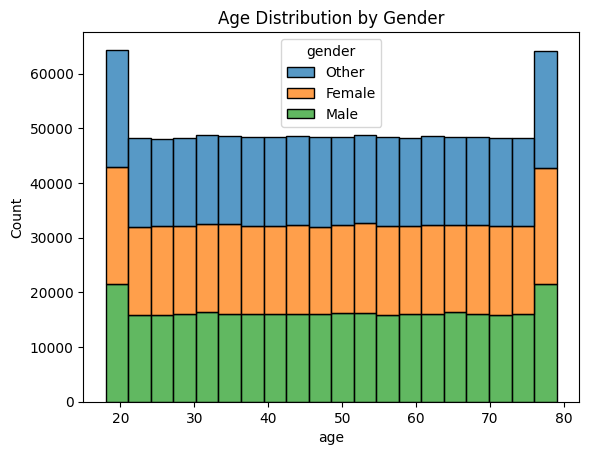

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart: Age distribution by gender
sns.histplot(data=df, x='age', hue='gender', multiple='stack', bins=20)
plt.title('Age Distribution by Gender')
plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\AgeVsGender.png')


C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\4110624122.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_usage_distribution = df_processed.groupby('age_group')['membership_years'].value_counts(normalize=True).unstack().fillna(0)


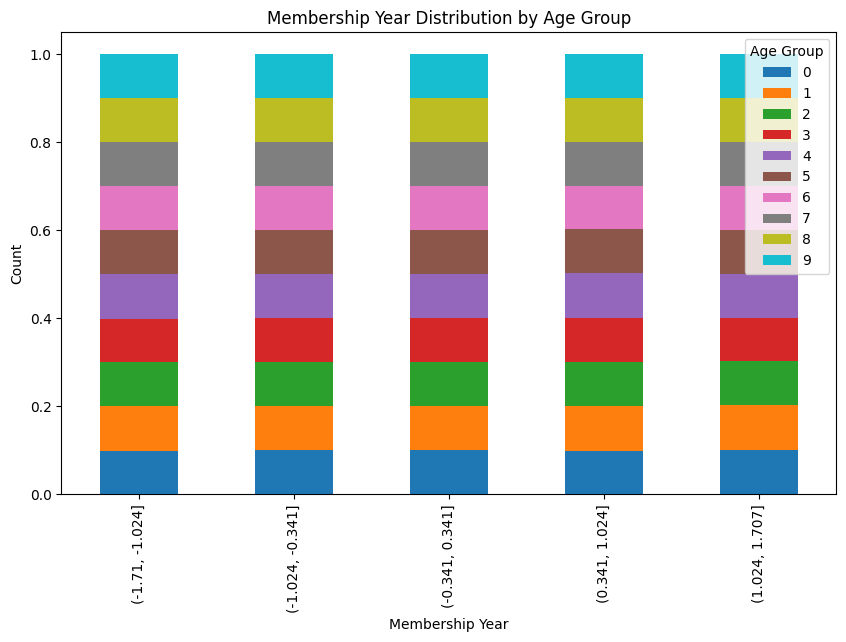

<Figure size 640x480 with 0 Axes>

In [17]:
age_bins = 5
df_processed['age_group'] = pd.cut(df_processed['age'], bins=age_bins)
app_usage_distribution = df_processed.groupby('age_group')['membership_years'].value_counts(normalize=True).unstack().fillna(0)
plt.figure(figsize=(10, 6))
app_usage_distribution.plot(kind='bar', stacked=True,ax=plt.gca())
plt.title('Membership Year Distribution by Age Group')
plt.xlabel('Membership Year')
plt.ylabel('Count')
plt.legend(title='Age Group', loc='upper right')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\MembershipYearVsAgeGroup.png')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\721570476.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_usage_distribution = df_processed.groupby('age_group')['app_usage'].value_counts(normalize=True).unstack().fillna(0)


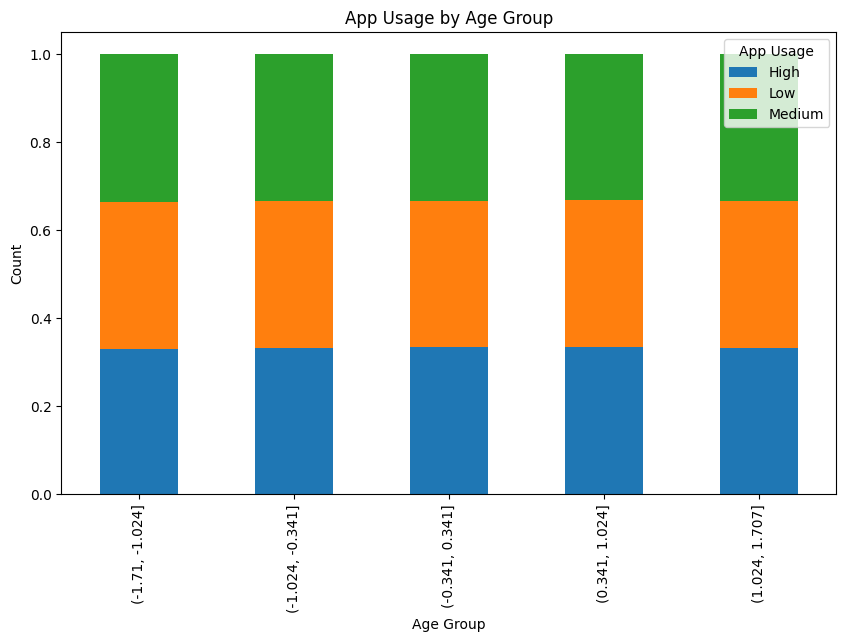

<Figure size 640x480 with 0 Axes>

In [18]:
age_bins = 5
df_processed['age_group'] = pd.cut(df_processed['age'], bins=age_bins)
app_usage_distribution = df_processed.groupby('age_group')['app_usage'].value_counts(normalize=True).unstack().fillna(0)
plt.figure(figsize=(10, 6))
app_usage_distribution.plot(kind='bar', stacked=True,ax=plt.gca())
plt.title('App Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='App Usage', loc='upper right')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\AppUsageVsAgeGroup.png')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\1469403395.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_category_pivot = df_processed.pivot_table(values='avg_spent_per_category', index='age_group', columns='product_category')


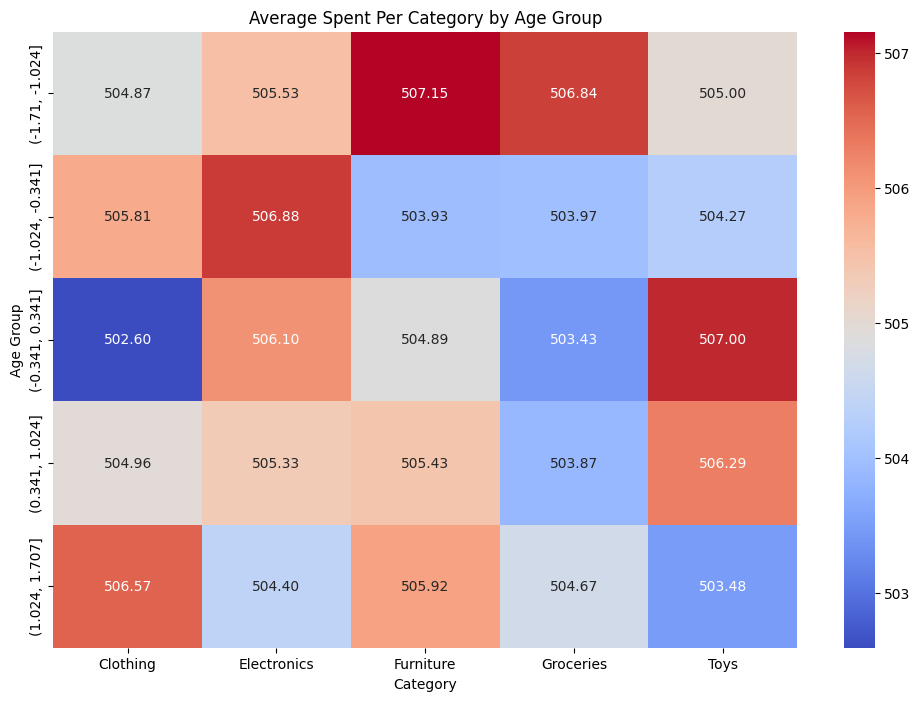

<Figure size 640x480 with 0 Axes>

In [19]:

plt.figure(figsize=(12, 8))
age_category_pivot = df_processed.pivot_table(values='avg_spent_per_category', index='age_group', columns='product_category')
sns.heatmap(age_category_pivot, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Average Spent Per Category by Age Group')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\AvgSpentPerCategoryVsAgeGroup.png')


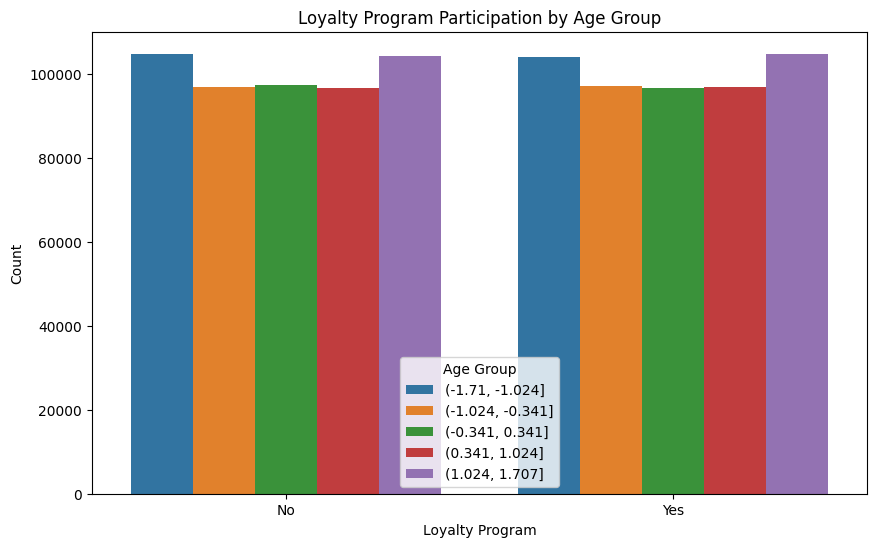

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_processed, x='loyalty_program', hue='age_group')
plt.title('Loyalty Program Participation by Age Group')
plt.xlabel('Loyalty Program')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\LoyaltyProgramVsAgeGroup.png')

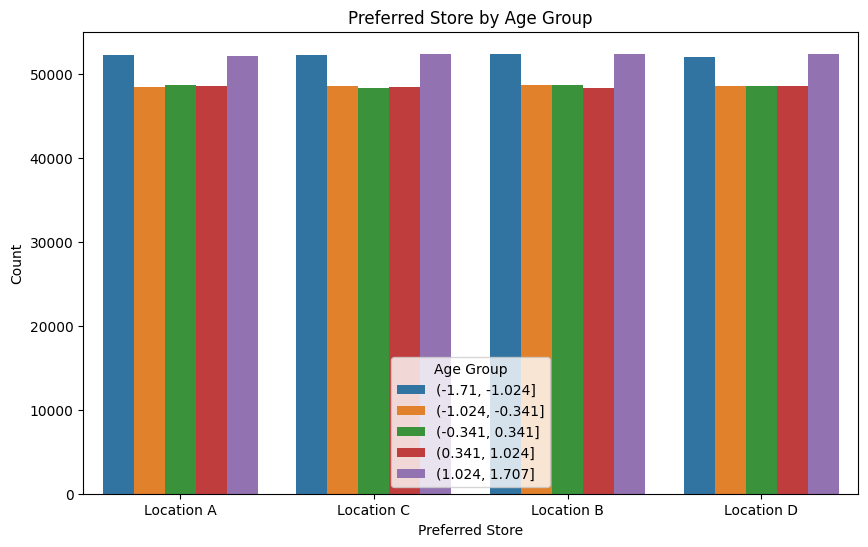

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_processed, x='preferred_store', hue='age_group')
plt.title('Preferred Store by Age Group')
plt.xlabel('Preferred Store')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\PreferredStoreVsAgeGroup.png')

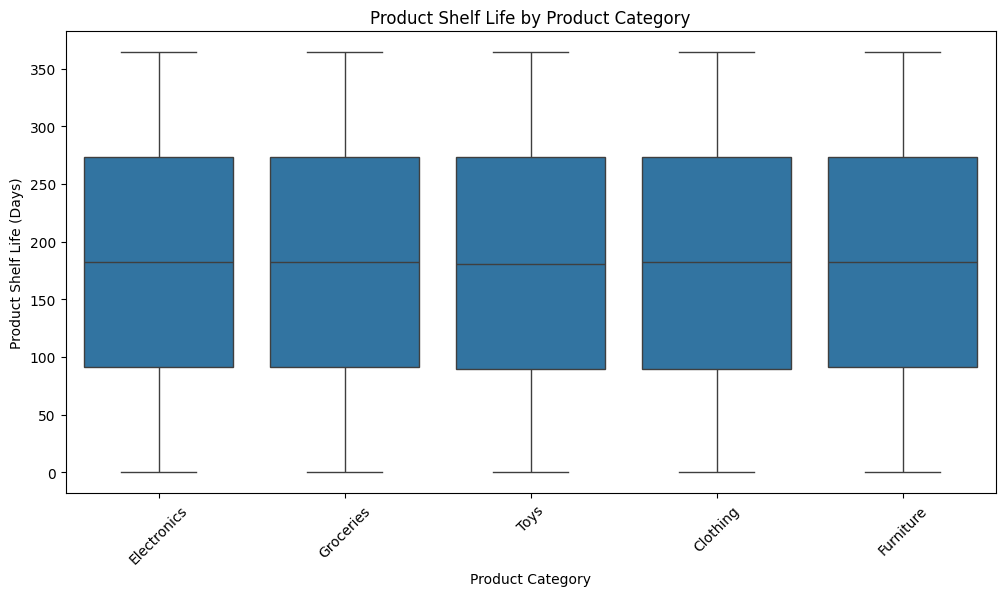

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot 1: Product Shelf Life by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category', y='product_shelf_life', data=df_processed)
plt.title('Product Shelf Life by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Product Shelf Life (Days)')
plt.xticks(rotation=45)
plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\ProductShelfLifeVsProductCategory.png')

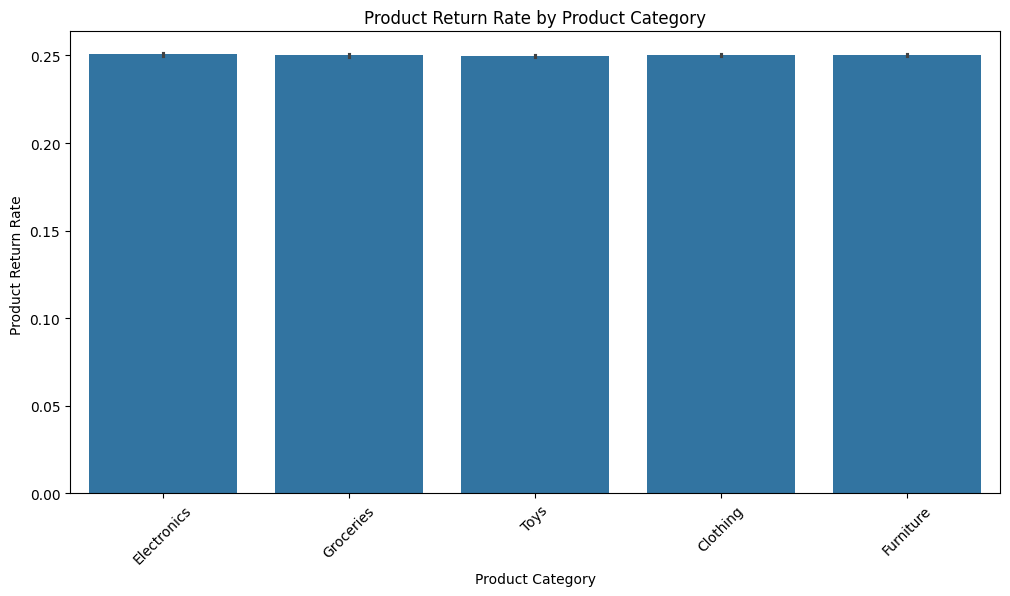

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot 2: Product Return Rate by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category', y='product_return_rate', data=df_processed)
plt.title('Product Return Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Product Return Rate ')
plt.xticks(rotation=45)
plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\ProductReturnRateVsProductCategory.png')

Transaction Analysis

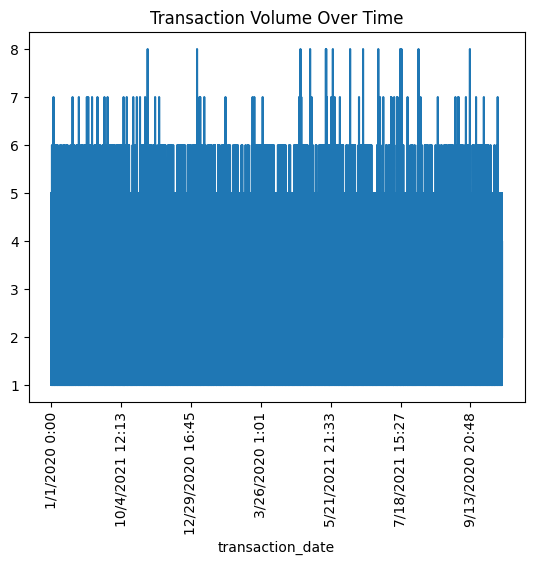

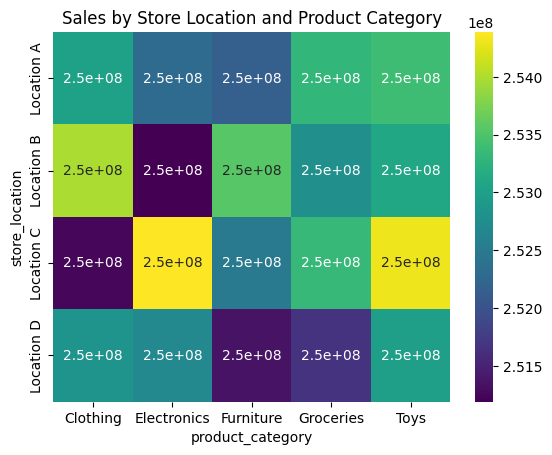

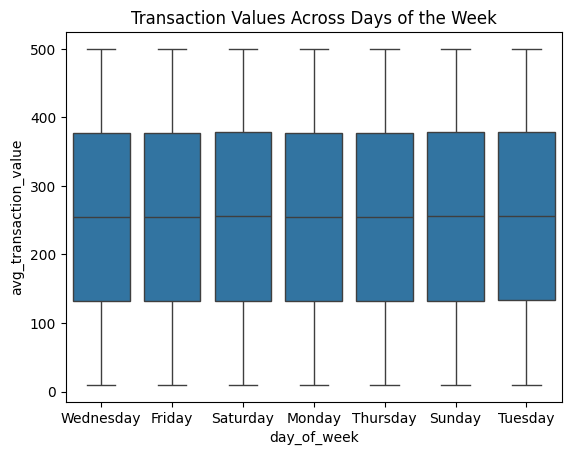

<Figure size 640x480 with 0 Axes>

In [24]:
# Time Series Plot: Transaction volume over time
df.groupby('transaction_date').size().plot()
plt.title('Transaction Volume Over Time')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\TransactionVolumeOverTime.png')

# Heatmap: Sales by store location and product category
pivot = df.pivot_table(index='store_location', columns='product_category', values='total_sales', aggfunc='sum')
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.title('Sales by Store Location and Product Category')
plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\SalesByStoreLocationAndProductCategory.png')
# Box Plot: Distribution of transaction values across different days of the week
sns.boxplot(data=df, x='day_of_week', y='avg_transaction_value')
plt.title('Transaction Values Across Days of the Week')
plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\TransactionValuesAcrossDaysOfWeek.png')

Product Performance

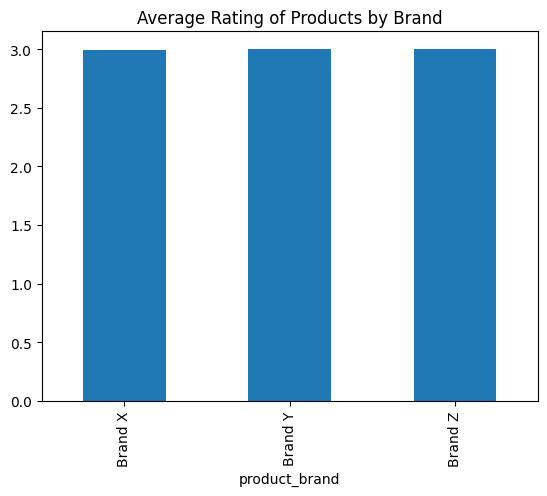

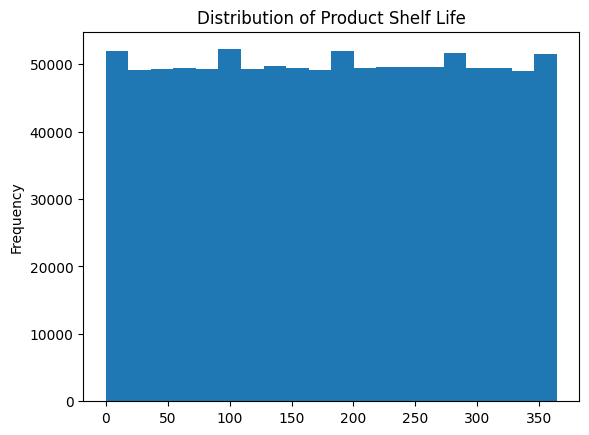

<Figure size 640x480 with 0 Axes>

In [25]:
# Bar Chart: Average rating of products by brand
df.groupby('product_brand')['product_rating'].mean().plot(kind='bar')
plt.title('Average Rating of Products by Brand')
plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\AvgRatingOfProductsByBrand.png')
# Histogram: Distribution of product shelf life
df['product_shelf_life'].plot.hist(bins=20)
plt.title('Distribution of Product Shelf Life')
plt.show()
plt.savefig('D:\\Documents\\36100\\DatasetSelection\\saved_images\\DistributionOfProductShelfLife.png')

**3. Predictive Models**
Churn Prediction (Classification)

In [26]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# import pandas as pd

# # Assume df is your DataFrame
# # Select features (including categorical ones) and target variable
# features = df[['age', 'avg_transaction_value', 'purchase_frequency', 'total_items_purchased', 'avg_purchase_value']]
# target = df['total_sales']

# # One-Hot Encode categorical variables
# features_encoded = pd.get_dummies(features)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# # Train a regression model (e.g., Random Forest)
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions and evaluate the model
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')
